# 1.Understanding the Data:

Import necessary libraries (e.g., pandas, matplotlib, seaborn).<br>
Load the COVID-19 dataset.<br>
Display basic information about the dataset (e.g., data types, missing values).<br>

In [1]:
# load required libraries/modules
import os
os.chdir("C:/datasets")
import pandas as pd
# Load the dataset
df=pd.read_csv("covid_19_data.csv")
df.head(10)
# Display basic information about the dataset



,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [63]:
df['Country/Region'].value_counts()

Country/Region
Russia                 30251
US                     26740
Japan                  18059
Mainland China         15758
India                  13182
                       ...  
 Azerbaijan                1
North Ireland              1
Republic of Ireland        1
Cape Verde                 1
East Timor                 1
Name: count, Length: 229, dtype: int64

In [60]:
df['Province/State']

0                     Anhui
1                   Beijing
2                 Chongqing
3                    Fujian
4                     Gansu
                ...        
306424    Zaporizhia Oblast
306425              Zeeland
306426             Zhejiang
306427      Zhytomyr Oblast
306428         Zuid-Holland
Name: Province/State, Length: 306429, dtype: object

In [2]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [3]:
df.shape

(306429, 8)

In [4]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [5]:
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [6]:
df['Province/State'].mode()

0    Unknown
Name: Province/State, dtype: object

# 2. Data Cleaning:

In [ ]:
Handle missing values.
Convert data types if necessary.
Check for duplicates.

In [ ]:
# Handle missing values



# Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime

# df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Check for duplicates
# print("Number of duplicates:", df.duplicated().sum())


In [8]:
categorical=[]
continuous=[]

for i in df:
    if df[i].dtypes=='object':
        categorical.append(i)
    elif df[i].dtypes=='datetime64[ns]':
        categorical.append(i)
    else:
        continuous.append(i)

In [9]:
categorical

['ObservationDate', 'Province/State', 'Country/Region', 'Last Update']

In [10]:
continuous

['SNo', 'Confirmed', 'Deaths', 'Recovered']

In [11]:
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [57]:
df['Province/State'].value_counts()

Province/State
Unknown                         82226
Amazonas                         1109
Diamond Princess cruise ship      924
Grand Princess                    882
Punjab                            708
                                ...  
Harrison County, KY                 1
Queens County, NY                   1
Johnson County, IA                  1
Unassigned Location, VT             1
Charlotte County, FL                1
Name: count, Length: 736, dtype: int64

In [13]:
df['Province/State'].dtypes

dtype('O')

In [14]:
df['Province/State'].mode()

0    Unknown
Name: Province/State, dtype: object

In [15]:
for i in df:
    if df[i].dtypes=='object':
        m=df[i].mode()[0]
        df[i]=df[i].fillna(m)
    else:
        me=df[i].mean()
        df[i]=df[i].fillna(me)

In [16]:
df.isna().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [21]:
df['ObservationDate'].dtypes

dtype('O')

In [48]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [49]:
df['ObservationDate'].dtypes

dtype('<M8[ns]')

In [19]:
df['Last Update'].dtypes

dtype('O')

In [24]:
df['Last Update'] = pd.to_datetime(df['Last Update'],format='mixed',dayfirst=True)

In [50]:
df['Last Update'].dtypes

dtype('<M8[ns]')

In [51]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [27]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
306424    False
306425    False
306426    False
306427    False
306428    False
Length: 306429, dtype: bool

In [81]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [82]:
print("Number of duplicates for province Columns:", df['Province/State'].duplicated().sum())

Number of duplicates for province Columns: 305693


In [83]:
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
5,6,2020-01-22,Guangdong,Mainland China,2020-01-22 17:00:00,26.0,0.0,0.0
6,7,2020-01-22,Guangxi,Mainland China,2020-01-22 17:00:00,2.0,0.0,0.0
7,8,2020-01-22,Guizhou,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
8,9,2020-01-22,Hainan,Mainland China,2020-01-22 17:00:00,4.0,0.0,0.0
9,10,2020-01-22,Hebei,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0


# 3. Descriptive Statistics:

Generate descriptive statistics (mean, median, min, max) for numeric columns.<br>
Explore summary statistics for categorical columns.

In [ ]:
# Descriptive statistics


# Summary statistics for categorical columns



In [84]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [89]:
categorical

['ObservationDate', 'Province/State', 'Country/Region', 'Last Update']

In [66]:
df['ObservationDate'].value_counts()

ObservationDate
2021-05-29    765
2021-02-22    765
2021-02-24    765
2021-02-25    765
2021-02-26    765
             ... 
2020-01-26     49
2020-01-23     48
2020-01-25     46
2020-01-24     43
2020-01-22     40
Name: count, Length: 494, dtype: int64

In [67]:
df['Province/State'].value_counts()

Province/State
Unknown                         82226
Amazonas                         1109
Diamond Princess cruise ship      924
Grand Princess                    882
Punjab                            708
                                ...  
Harrison County, KY                 1
Queens County, NY                   1
Johnson County, IA                  1
Unassigned Location, VT             1
Charlotte County, FL                1
Name: count, Length: 736, dtype: int64

In [68]:
df['Country/Region'].value_counts()

Country/Region
Russia                 30251
US                     26740
Japan                  18059
Mainland China         15758
India                  13182
                       ...  
 Azerbaijan                1
North Ireland              1
Republic of Ireland        1
Cape Verde                 1
East Timor                 1
Name: count, Length: 229, dtype: int64

In [90]:
df['Last Update'].value_counts()

Last Update
2021-04-02 15:13:53    239885
2020-08-03 05:31:00      1252
2021-05-30 04:20:55       765
2021-04-26 04:21:04       765
2021-04-20 04:20:41       765
                        ...  
2020-02-16 18:03:02         1
2020-02-29 04:03:18         1
2020-03-11 21:13:23         1
2020-03-11 10:33:03         1
2020-02-18 14:53:02         1
Name: count, Length: 1904, dtype: int64

In [97]:
df.describe()

,SNo,ObservationDate,Last Update,Confirmed,Deaths,Recovered
count,306429.000000,306429,306429,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,2020-11-06 01:54:54.146441728,2021-03-11 15:39:45.931191040,8.567091e+04,2036.403268,5.042029e+04
min,1.000000,2020-01-22 00:00:00,2020-01-02 01:52:00,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,2020-07-30 00:00:00,2021-04-02 15:13:53,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,2020-11-10 00:00:00,2021-04-02 15:13:53,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,2021-02-18 00:00:00,2021-04-02 15:13:53,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,2021-05-29 00:00:00,2021-05-30 04:20:55,5.863138e+06,112385.000000,6.399531e+06
std,88458.577156,NaN,NaN,2.775516e+05,6410.938048,2.015124e+05


In [92]:
df['Province/State'].describe()

count      306429
unique        736
top       Unknown
freq        82226
Name: Province/State, dtype: object

In [96]:
df['Country/Region'].describe()

count     306429
unique       229
top       Russia
freq       30251
Name: Country/Region, dtype: object

In [99]:
df['Province/State'].nunique()

736

In [111]:
df['Country/Region'].nunique()

229

In [100]:
continuous

['SNo', 'Confirmed', 'Deaths', 'Recovered']

In [101]:
df['Province/State'].mode()

0    Unknown
Name: Province/State, dtype: object

In [102]:
df['Country/Region'].mode()

0    Russia
Name: Country/Region, dtype: object

In [103]:
df['ObservationDate'].mode()

0     2021-01-21
1     2021-01-22
2     2021-01-23
3     2021-01-24
4     2021-01-25
         ...    
124   2021-05-25
125   2021-05-26
126   2021-05-27
127   2021-05-28
128   2021-05-29
Name: ObservationDate, Length: 129, dtype: datetime64[ns]

In [104]:
df['Last Update'].mode()

0   2021-04-02 15:13:53
Name: Last Update, dtype: datetime64[ns]

In [107]:
df['SNo'].describe()

count    306429.000000
mean     153215.000000
std       88458.577156
min           1.000000
25%       76608.000000
50%      153215.000000
75%      229822.000000
max      306429.000000
Name: SNo, dtype: float64

In [108]:
df['Confirmed'].describe()

count    3.064290e+05
mean     8.567091e+04
std      2.775516e+05
min     -3.028440e+05
25%      1.042000e+03
50%      1.037500e+04
75%      5.075200e+04
max      5.863138e+06
Name: Confirmed, dtype: float64

In [109]:
df['Deaths'].describe()

count    306429.000000
mean       2036.403268
std        6410.938048
min        -178.000000
25%          13.000000
50%         192.000000
75%        1322.000000
max      112385.000000
Name: Deaths, dtype: float64

In [110]:
df['Recovered'].describe()

count    3.064290e+05
mean     5.042029e+04
std      2.015124e+05
min     -8.544050e+05
25%      1.100000e+01
50%      1.751000e+03
75%      2.027000e+04
max      6.399531e+06
Name: Recovered, dtype: float64

# 4. Time Series Analysis:

Analyze the trends in confirmed, deaths, and recovered cases over time.<br>
Create time-based visualizations.

In [ ]:
# Time series analysis
# groupby 'ObservationDate' and apply aggregation functions like sum on deaths,confirmed ,recovered 
# df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot time series data using line plot

# syntax: 
#sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
# sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')




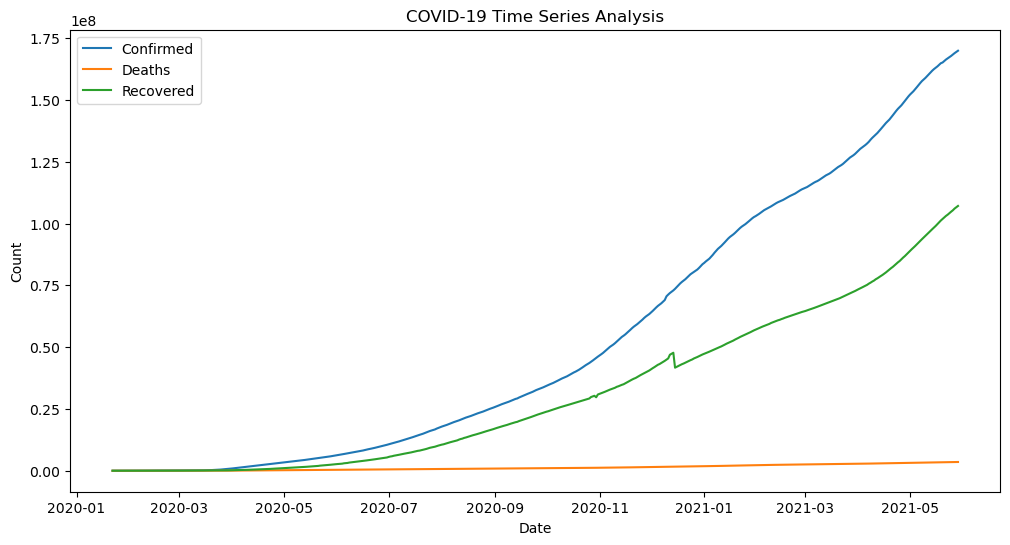

In [30]:
# Time series analysis
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot time series data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')
sns.lineplot(data=df_time, x='ObservationDate', y='Recovered', label='Recovered')
plt.title('COVID-19 Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [12]:
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [10]:
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

In [11]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
01/01/2021,84092619.0,1834675.0,47313005.0
01/02/2021,84718978.0,1843108.0,47614297.0
01/03/2021,85251774.0,1850449.0,47882779.0
01/04/2021,85805892.0,1860598.0,48173187.0
01/05/2021,86546014.0,1875953.0,48488548.0
...,...,...,...
12/27/2020,80912611.0,1771659.0,45717710.0
12/28/2020,81408934.0,1781415.0,46016136.0
12/29/2020,82073362.0,1796786.0,46369231.0


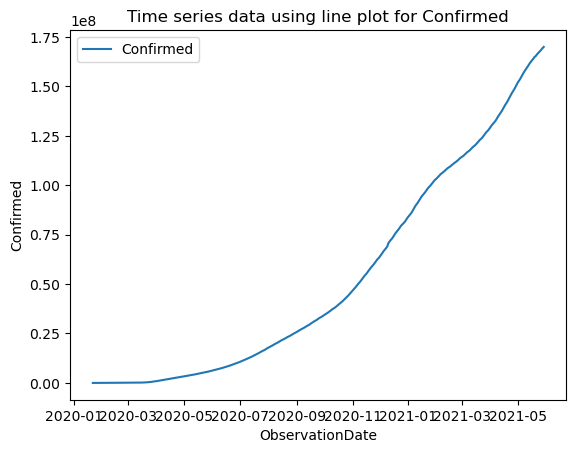

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
plt.title("Time series data using line plot for Confirmed")
plt.show()

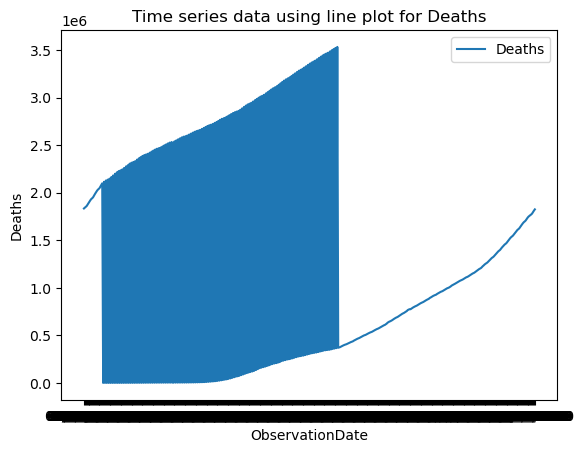

In [19]:
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')
plt.title("Time series data using line plot for Deaths")
plt.xlabel('ObservationDate')
plt.ylabel('Deaths')
plt.show()

In [28]:
continuous

['SNo', 'Confirmed', 'Deaths', 'Recovered']

<Axes: ylabel='Frequency'>

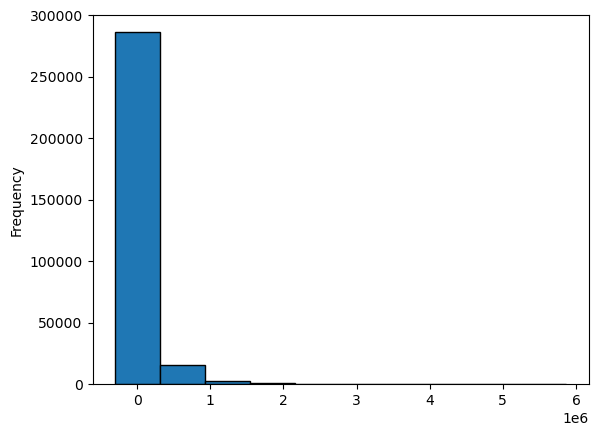

In [30]:
df['Confirmed'].plot(kind='hist',edgecolor='black')

<Axes: >

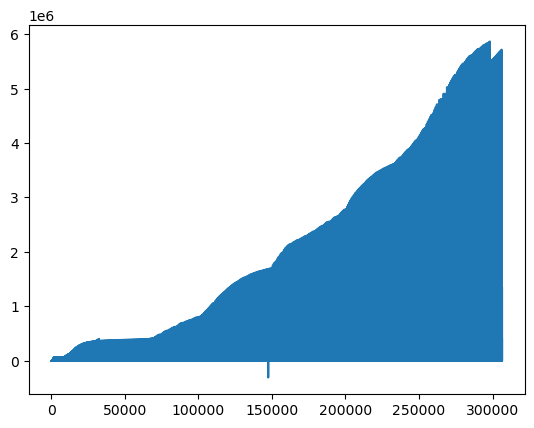

In [31]:
df['Confirmed'].plot()

Text(0, 0.5, 'Count')

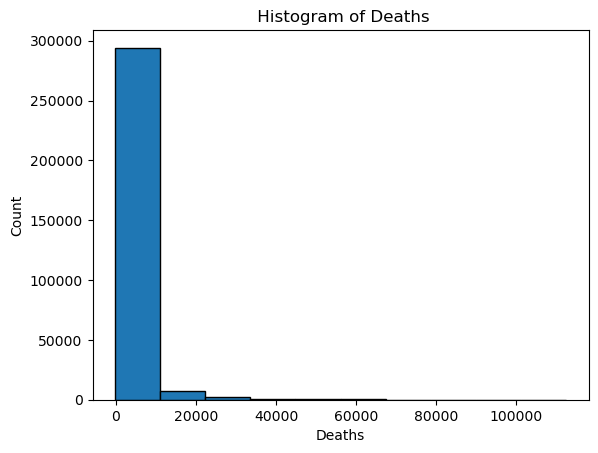

In [38]:
plt.title(' Histogram of Deaths')
plt.hist(df['Deaths'],edgecolor="black")
plt.xlabel('Deaths')
plt.ylabel('Count')

<Axes: >

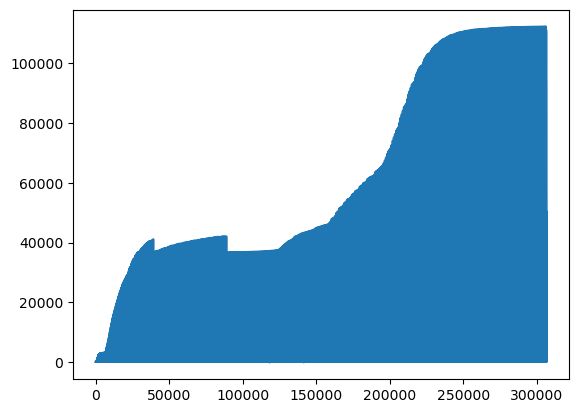

In [33]:
df['Deaths'].plot()

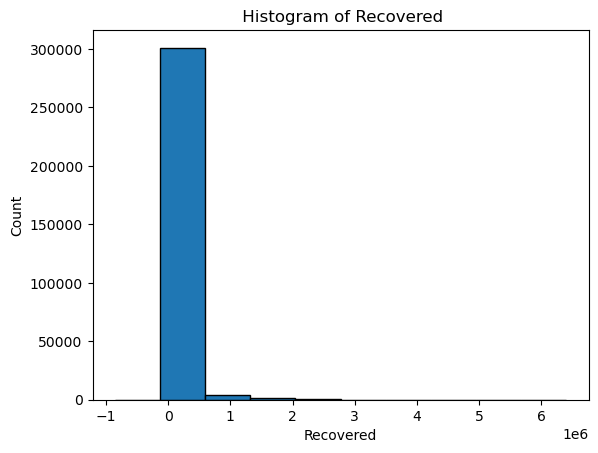

In [39]:
plt.title(' Histogram of Recovered')
plt.hist(df['Recovered'],edgecolor="black")
plt.xlabel('Recovered')
plt.ylabel('Count')
plt.show()

<Axes: >

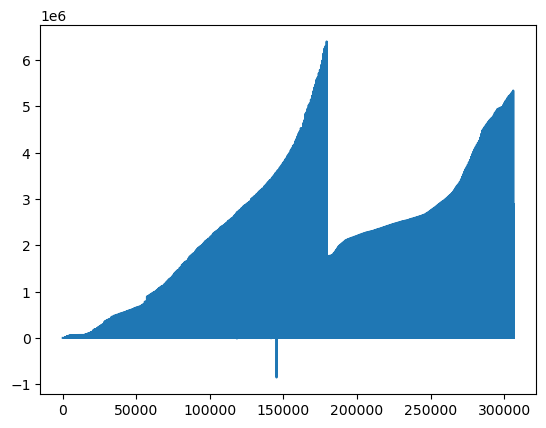

In [35]:
df['Recovered'].plot()

# 5. Geographical Analysis:

Analyze the distribution of cases across different countries/regions.<br>
Create geographical visualizations (e.g., world map).

In [ ]:
# Geographical analysis
# df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot geographical data
# sns.barplot(x=df_country.index, y='Confirmed', data=df_country)



In [55]:
df_country10=df_country.head(10)

In [56]:
df_country10

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,17026442.0,669075.0,13464399.0
Albania,19768869.0,375955.0,13945256.0
Algeria,27684358.0,834464.0,18959299.0
Andorra,2379802.0,32100.0,2162473.0
Angola,4764863.0,116489.0,3683041.0
Antigua and Barbuda,143868.0,4059.0,109958.0
Argentina,504802880.0,12112441.0,438750295.0


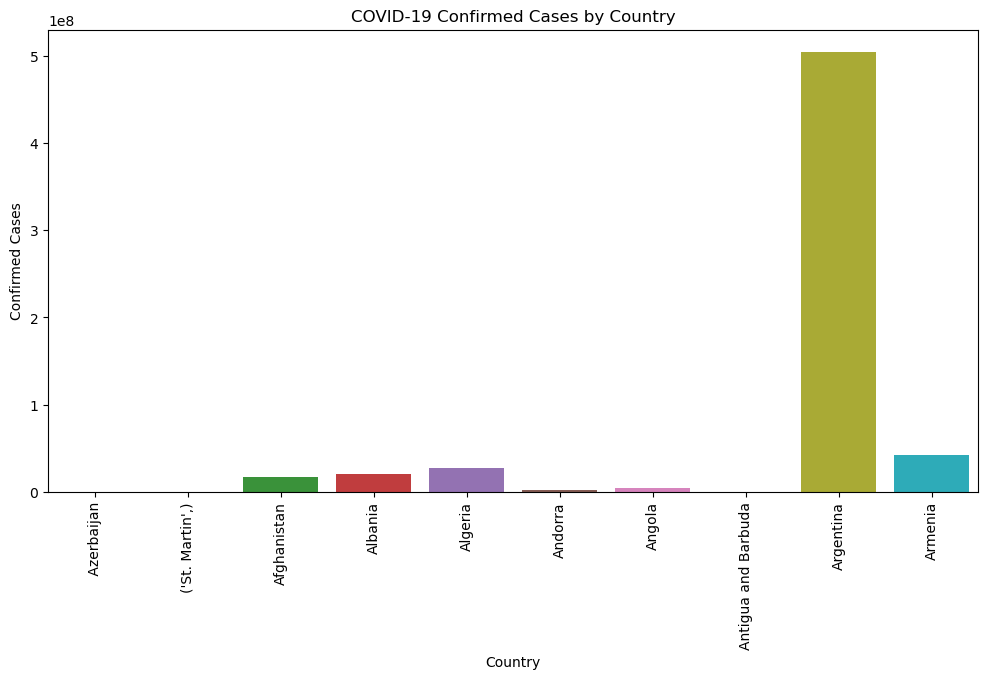

In [57]:
# Geographical analysis
df_country10 = df_country10.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot geographical data
plt.figure(figsize=(12, 6))
sns.barplot(x=df_country10.index, y='Confirmed', data=df_country10)
plt.title('COVID-19 Confirmed Cases by Country')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90, ha='center')
plt.show()


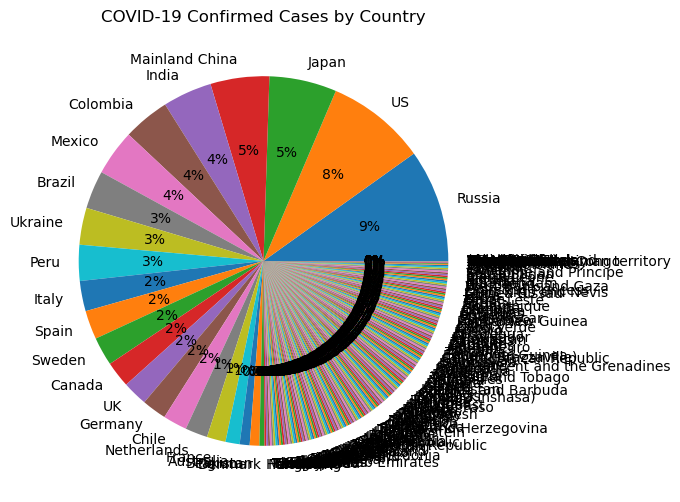

In [40]:
plt.figure(figsize=(12, 6))
plt.pie(df['Country/Region'].value_counts(),labels=df['Country/Region'].value_counts().index, autopct='%d%%')
plt.title('COVID-19 Confirmed Cases by Country')
plt.show()

In [40]:
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

In [41]:
df_country

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,17026442.0,669075.0,13464399.0
Albania,19768869.0,375955.0,13945256.0
Algeria,27684358.0,834464.0,18959299.0
...,...,...,...
West Bank and Gaza,41819444.0,440378.0,37003116.0
Yemen,962066.0,237613.0,506523.0
Zambia,13493953.0,205990.0,12625626.0


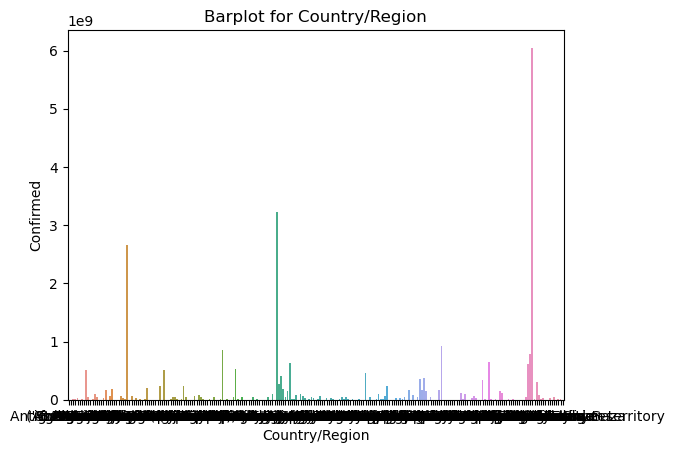

In [49]:
sns.barplot(x=df_country.index, y='Confirmed', data=df_country)
plt.title("Barplot for Country/Region")
plt.show()

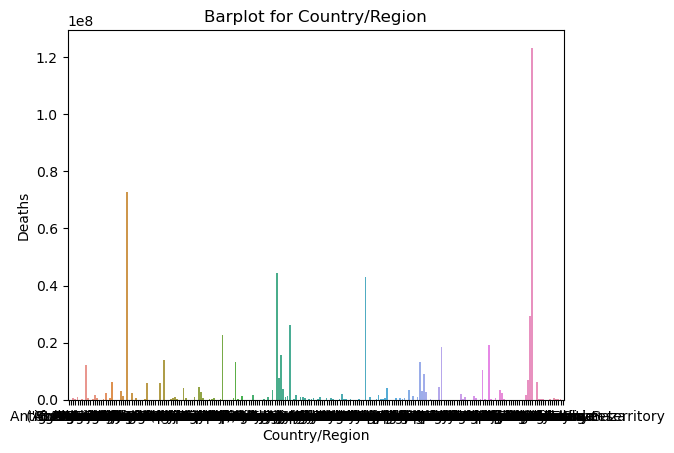

In [46]:
sns.barplot(x=df_country.index, y='Deaths', data=df_country)
plt.title("Barplot for Country/Region")
plt.show()

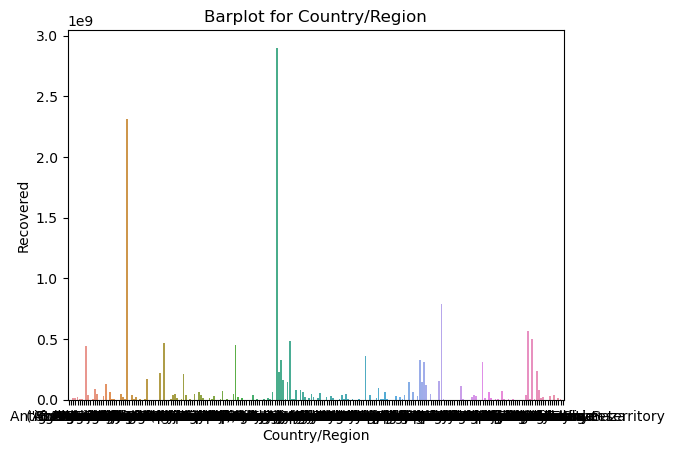

In [52]:
sns.barplot(x=df_country.index, y='Recovered', data=df_country)
plt.title("Barplot for Country/Region")
plt.show()

In [53]:
categorical

['ObservationDate', 'Province/State', 'Country/Region', 'Last Update']

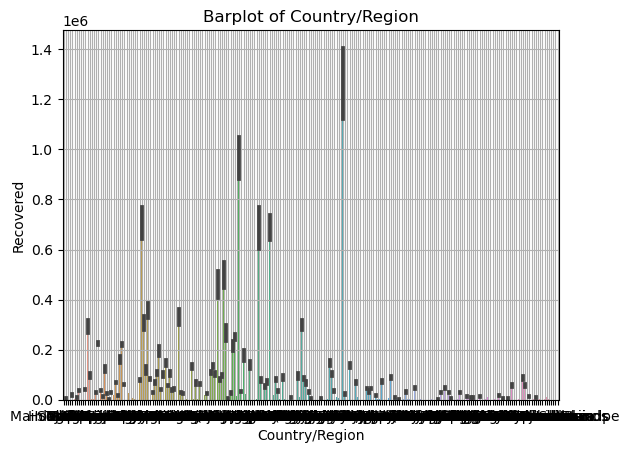

In [59]:
sns.barplot(x='Country/Region',y='Recovered', data=df)
plt.title("Barplot of Country/Region")
plt.grid()
plt.show()

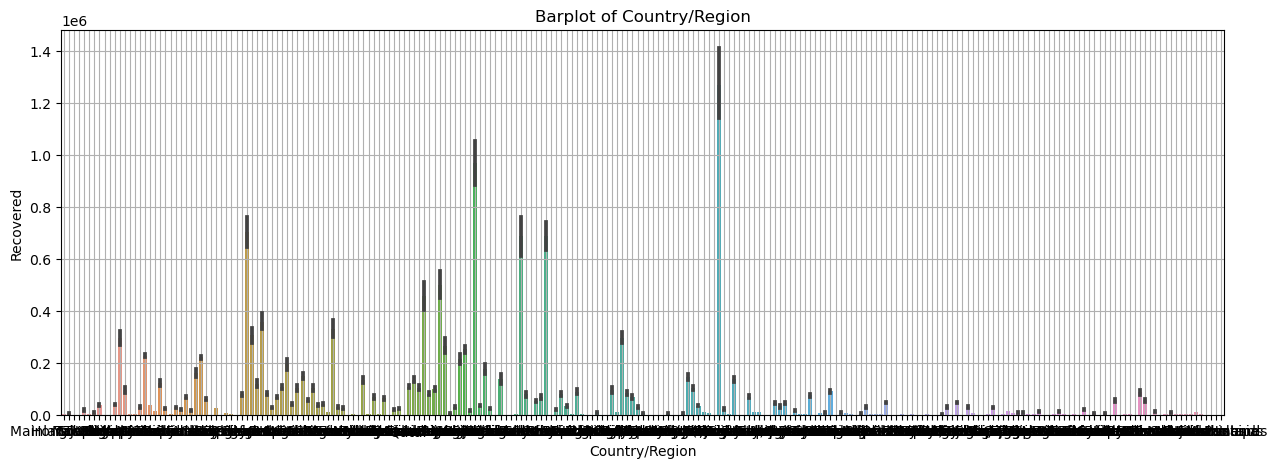

In [90]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Country/Region',y='Recovered', data=df)
plt.title("Barplot of Country/Region")
plt.grid()
plt.show()

In [89]:
plt.figure(figsize=(200,100))
sns.barplot(x='Country/Region',y='Recovered', data=df)
plt.title("Barplot of Country/Region")
plt.grid()
plt.show()

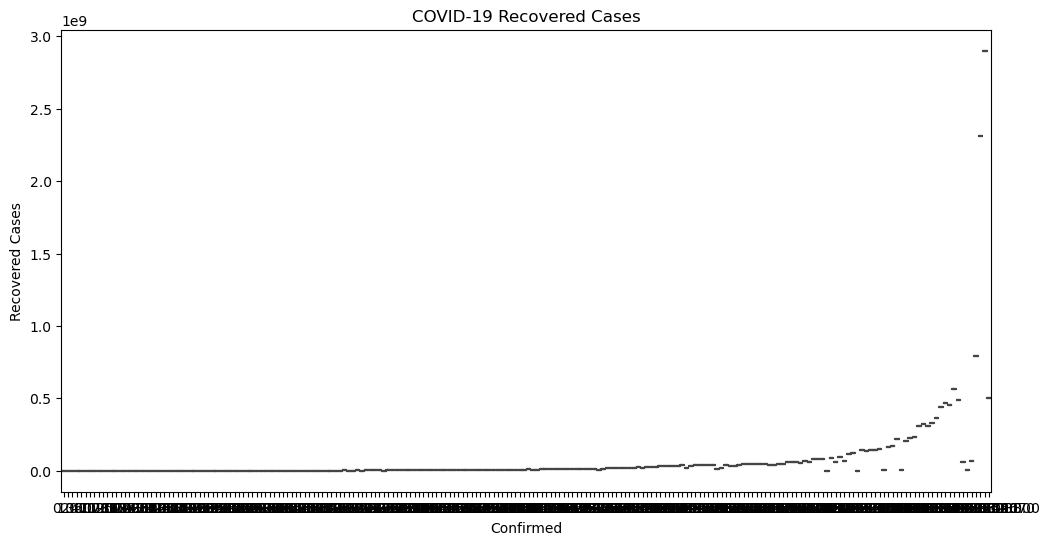

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Confirmed', y='Recovered', data=df_country)
plt.title('COVID-19 Recovered Cases')
plt.xlabel('Confirmed')
plt.ylabel('Recovered Cases')
plt.show()

plt.pie(df['Country/Region'].value_counts(),labels=df['Country/Region'].value_counts().index, autopct='%d%%')
plt.show()

# 6. Correlation Analysis:

Examine the correlation between different numeric variables.

In [ ]:
# Correlation analysis between confirmed,deaths and recovered

# Plot correlation on heat map



In [36]:
# Correlation analysis
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()
correlation_matrix

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.888416,0.633479
Deaths,0.888416,1.000000,0.538416
Recovered,0.633479,0.538416,1.000000


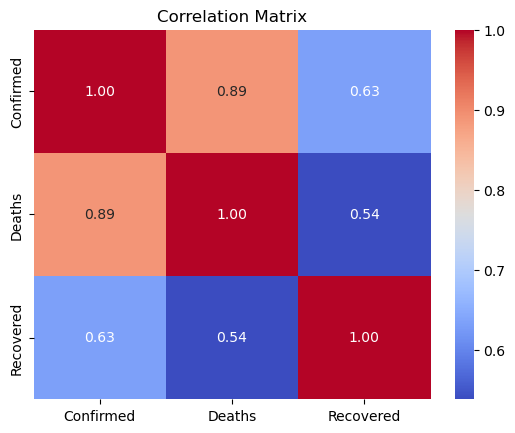

In [39]:
# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [67]:
df[['Confirmed','Deaths','Recovered']].corr()

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.888416,0.633479
Deaths,0.888416,1.000000,0.538416
Recovered,0.633479,0.538416,1.000000


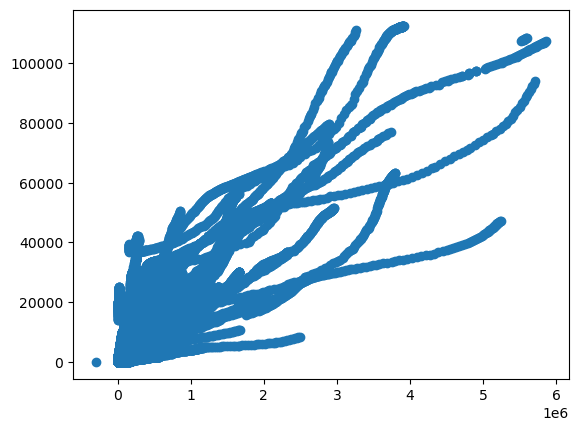

In [66]:
plt.scatter(df['Confirmed'],df['Deaths'])

In [64]:
df[['Confirmed','Recovered']].corr()

,Confirmed,Recovered
Confirmed,1.000000,0.633479
Recovered,0.633479,1.000000


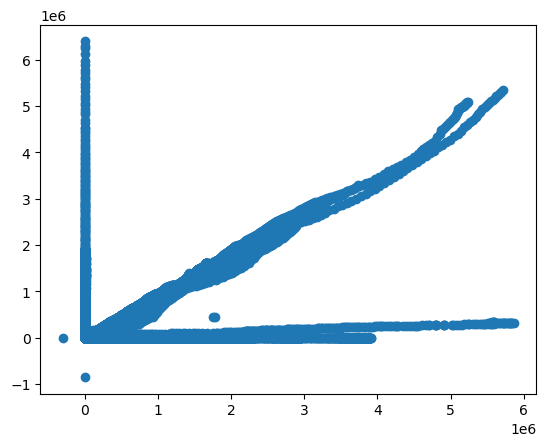

In [65]:
plt.scatter(df['Confirmed'],df['Recovered'])

C:\Users\avrut\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

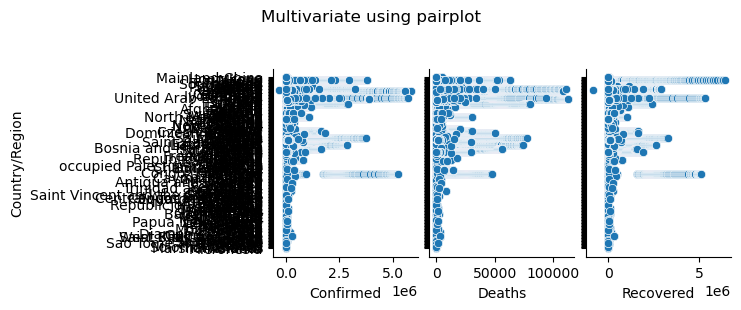

In [80]:
plt.figure(figsize=(15, 5))
sns.pairplot(df,x_vars=['Confirmed','Deaths','Recovered'],y_vars='Country/Region')
plt.suptitle('Multivariate using pairplot',y=1.2)
plt.show()

# 7. Advanced Analysis:

Explore advanced visualizations or statistical tests based on the specific questions you want to answer.

In [78]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.
 
import matplotlib.pyplot as plt

Total_cases = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

Total_cases


,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,17026442.0,669075.0,13464399.0
Albania,19768869.0,375955.0,13945256.0
Algeria,27684358.0,834464.0,18959299.0
...,...,...,...
West Bank and Gaza,41819444.0,440378.0,37003116.0
Yemen,962066.0,237613.0,506523.0
Zambia,13493953.0,205990.0,12625626.0


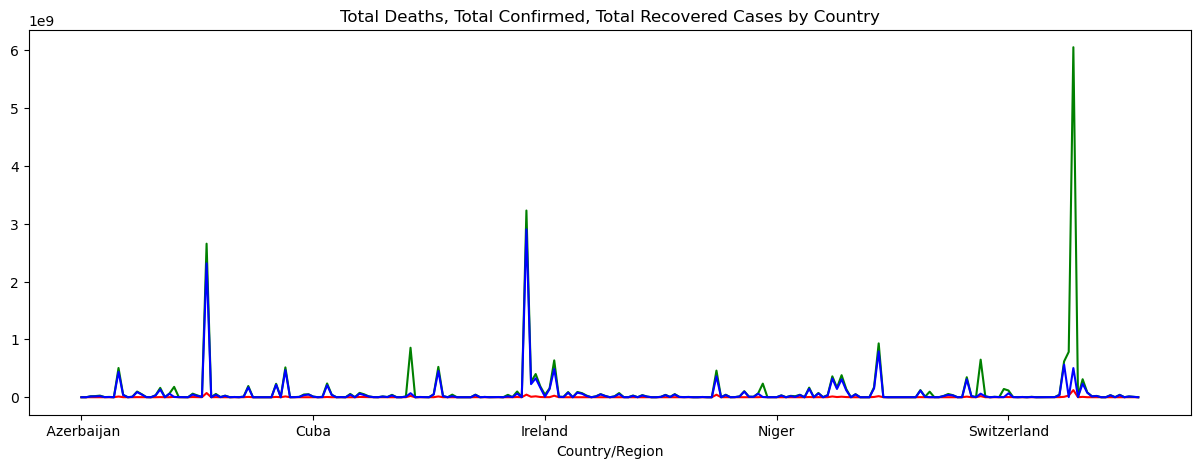

In [79]:
plt.figure(figsize=(15, 5))
Total_cases['Deaths'].plot(color='red')
Total_cases['Confirmed'].plot(color='green')
Total_cases['Recovered'].plot(color='blue')
plt.title('Total Deaths, Total Confirmed, Total Recovered Cases by Country')
plt.show()

In [91]:
# Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.
Max_cases = df.groupby('Country/Region').agg({'Confirmed': 'max', 'Deaths': 'max', 'Recovered': 'max'})

Max_cases


,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,70111.0,2899.0,57281.0
Albania,132297.0,2449.0,129215.0
Algeria,128456.0,3460.0,89419.0
...,...,...,...
West Bank and Gaza,307838.0,3492.0,300524.0
Yemen,6731.0,1319.0,3399.0
Zambia,94751.0,1276.0,91594.0


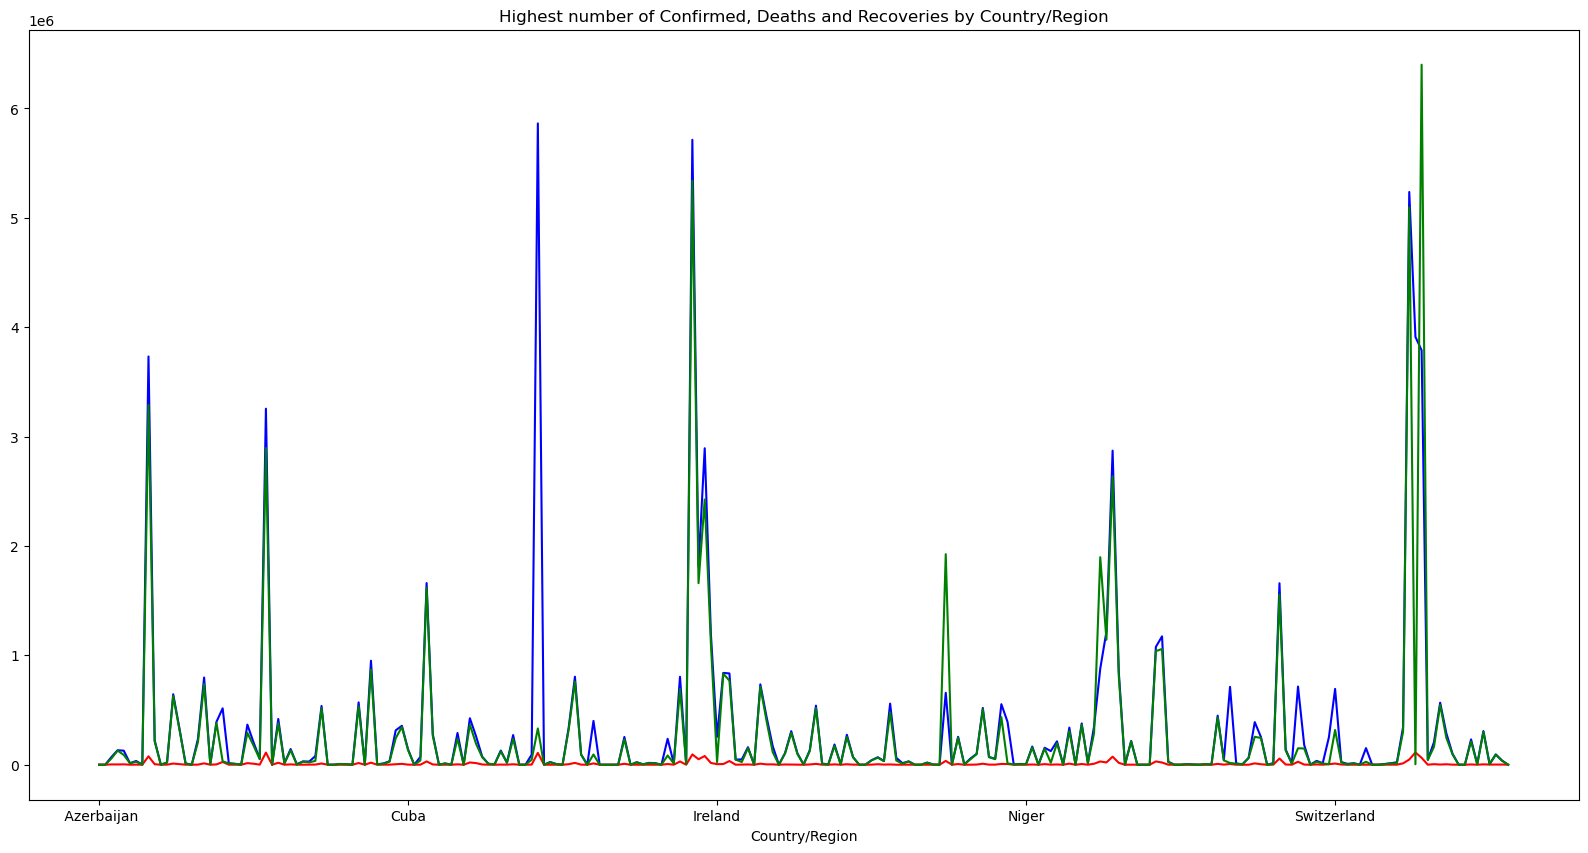

In [92]:
plt.figure(figsize=(20, 10))
Max_cases['Confirmed'].plot(color='blue')
Max_cases['Deaths'].plot(color='red')
Max_cases['Recovered'].plot(color='green')
plt.title('Highest number of Confirmed, Deaths and Recoveries by Country/Region')
plt.show()

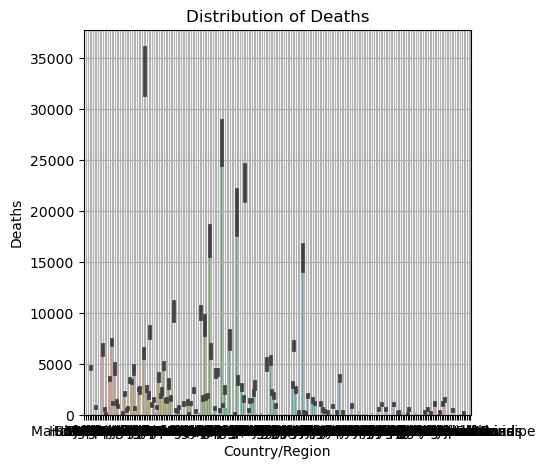

In [87]:
# Visualize the distribution of deaths using bar chart
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.barplot(x='Country/Region',y='Deaths', data=df)
plt.title("Distribution of Deaths")
plt.grid()
plt.show()
